Performing Denoising of an image using autoenocder

In [8]:
import keras
from keras.datasets import mnist
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(xtrain,_),(xtest,_)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtest.shape

(10000, 28, 28)

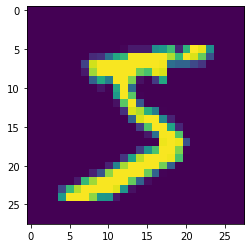

In [9]:
plt.imshow(xtrain[0])

In [10]:
xtrain=xtrain.astype('float32')/255.
xtest=xtest.astype('float32')/255.

In [11]:
xtrain.shape

(60000, 28, 28)

In [13]:
xtest.shape

(10000, 28, 28)

In [14]:
xtrain=np.reshape(xtrain,(len(xtrain),28,28,1))
xtest=np.reshape(xtest,(len(xtest),28,28,1))

In [15]:
noise_factor=0.5

In [16]:
xtrain_noisy=xtrain+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=xtrain.shape)
xtest_noisy=xtest+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=xtest.shape)

In [17]:
xtrain_noisy=np.clip(xtrain_noisy,0.,1)
xtest_noisy=np.clip(xtest_noisy,0.,1)

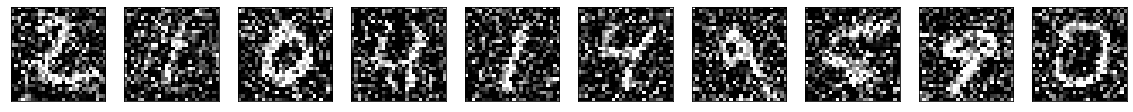

In [20]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(xtest_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [21]:
input_img=keras.Input(shape=(28,28,1))

In [23]:
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
encoded=layers.MaxPooling2D((2,2),padding='same')(x)

In [24]:
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
decoded=layers.Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [25]:
autoencoder=keras.Model(input_img,decoded)

In [27]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [28]:
autoencoder.fit(xtrain_noisy,xtrain,epochs=3,batch_size=128,validation_data=(xtest_noisy,xtest))

Epoch 1/3
469/469 [==============================] - 188s 397ms/step - loss: 0.1670 - val_loss: 0.1175
Epoch 2/3
469/469 [==============================] - 168s 358ms/step - loss: 0.1146 - val_loss: 0.1099
Epoch 3/3
469/469 [==============================] - 168s 358ms/step - loss: 0.1091 - val_loss: 0.1063


In [30]:
prediction=autoencoder.predict(xtest_noisy)

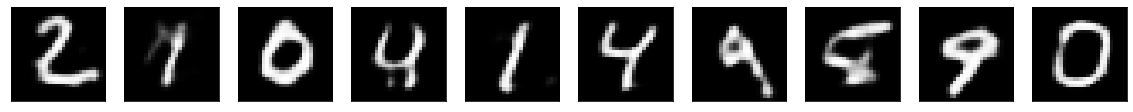

In [32]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(prediction[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)